# IT1244 Team 12: Model Stacking for Credit Card Approval Classification


Authors: Abhishek Balaji, Au Jun Hui, Fong Ken Rui, Sang Yong En Sean

## Table of Contents


1. [References/Cited Works](#scrollTo=2sbcd62bmSgO)
2. [Problem Formulation](#scrollTo=DUckWKk0QnJp)
3. [Datasets](#scrollTo=4bwDZCgMG_tI)
  * Exploratory Data Analysis
    * [`Application.csv`](#scrollTo=j_DMNs4rQgrt)
    * [`credit_record.csv`](#scrollTo=-RmOMqbxHr5X)
  * [Feature Engineering](#scrollTo=CQ7-jTzxVVdm)
4. [Machine Learning Models](#scrollTo=DGhuXPGgRpj4)
  * [Overview of Machine Learning Algorithms](#scrollTo=gn2fdjDKyBuc)
  * [Baseline Models](#scrollTo=W41l5pNlqvPM)
  * [Remedial Measure 1: SMOTE](#scrollTo=DaD5GSQPR86w)
  * [Remedial Measure 2: Using Class Weights during Model Training](#scrollTo=9VoAgXNNuLcc)
  * [Model Stacking to Optimise Predictive Capabilities](#scrollTo=GdxkqV4X1sL5)
5. [Testing the Model on Unlabelled Data](#scrollTo=uAyo2rGO7CEq)
6. [Conclusions](#scrollTo=bQvPvdCPGNST)

# Related/Referenced Works

1.   [Kaggle Notebook: Credit Card Approval Prediction Using ML](https://www.kaggle.com/code/rikdifos/credit-card-approval-prediction-using-ml)
    
2.   [Kaggle Notebook: Predicting Good & Bad Customers for Credit Cards
](https://www.kaggle.com/code/esmaascioglu/predicting-good-bad-customers-for-credit-cards)
3. [Stacking Ensemble Machine Learning With Python](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)
4. [How To Use “Model Stacking” To Improve Machine Learning Predictions](https://medium.com/geekculture/how-to-use-model-stacking-to-improve-machine-learning-predictions-d113278612d4)


## Problem Formulation

<a name = 'problem_formulation'></a>
We formulate our problem as aiming to minimize the rejection of 'Good' applicants, or False Negative Rate (FNR), while maximizing the rejection of 'Bad' applicants, or True Negative Rate (TNR), in order to assist with the credit card approval process.

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sn
import numpy as np
import itertools

## Datasets

Our datasets consists of two csv files, `Application.csv` and `credit_record.csv`. `Application.csv` contains records of applications for a credit card, while `credit_record.csv` contains the credit history records of existing credit card holders.

### `Application.csv`

#### Exploratory Data Analysis

In [ ]:
application_df = pd.read_csv("/content/application.csv", index_col=0)
application_df.head()

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


**Application.csv description**

| **Feature Name**    | **Description**                                  | **Remarks**                                                                                                           |
|---------------------|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| `id`                | ID of the applicant                              | NOT unique in the dataset.  A single applicant could have multiple applications, causing multiple IDs to be generated |
| `gender`            | Sex of applicant                                 | Binary: Male or Female                                                                                                |
| `own_car`           | Whether the applicant owns a car                 | Binary: Yes or No                                                                                                     |
| `own_realty`        | Whether the applicant owns real estate           | Binary: Yes or No                                                                                                     |
| `num_child`         | Number of children                               | Integer                                                                                                               |
| `income`            | Annual Income                                    | Rounded to the nearest hundred                                                                                        |
| `income type`       | Category of Income                               | Categorical                                                                                                           |
| `education`         | Highest Education Level                          | Categorical                                                                                                           |
| `family_status`     | Marriage Status                                  | Categorical                                                                                                           |
| `house_type`        | Type of house the applicant lives in             | Categorical                                                                                                           |
| `birth_day`         | Age of applicant in days                         |  Count backwards from current day (0), -1 means yesterday                                                                                                                     |
| `employment_length` | Starting date of employment     | Count backwards from current day(0). If positive, it means the person currently unemployed.                                                                                                                      |
| `mobile`            | Whether the applicant has a mobile phone         | Binary: 1 or 0                                                                                                        |
| `work_phone`        | Whether the applicant has a separate work phone  | Binary: 1 or 0                                                                                                        |
| `phone`             | Whether the applicant has a phone                | Binary: 1 or 0 Data is unclear since there is already a `mobile` feature and a `work_phone` feature                   |
| `email`             | Whether the applicant has an email               | Binary: 1 or 0                                                                                                        |
| `job`               | Job Category of the applicant                    | Categorical                                                                                                           |
| `CNT_FAM_MEMBERS`   | Number of living family members of the applicant | Integer                                                                                                               |

In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 438557 non-null  int64  
 1   gender             438557 non-null  object 
 2   own_car            438557 non-null  object 
 3   own_realty         438557 non-null  object 
 4   num_child          438557 non-null  int64  
 5   income             438557 non-null  float64
 6   income_type        438557 non-null  object 
 7   education_level    438557 non-null  object 
 8   family_status      438557 non-null  object 
 9   house_type         438557 non-null  object 
 10  birth_day          438557 non-null  int64  
 11  employment_length  438557 non-null  int64  
 12  mobile             438557 non-null  int64  
 13  work_phone         438557 non-null  int64  
 14  phone              438557 non-null  int64  
 15  email              438557 non-null  int64  
 16  jo

The `id` of applications are not unique, meaning that there are duplicates. We should try our best to remove them.

In [ ]:
app_unique_count = application_df['id'].nunique()
print(app_unique_count)

438510


Since the `id` column are not unique, we should see if for the same application `id`, the details of the application (e.g., employment length etc.) are exactly the same.

Ass seen below for a customer who has the same ID, the data is completely different. However, because there are only 94 of these duplicates, it is small enough a proportion for us to drop.

In [ ]:
application_df[application_df["id"] == 7602432]

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2


In [ ]:
application_df[application_df.duplicated("id", keep=False)]

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3
421698,7213374,M,Y,N,0,148500.0,Working,Secondary / secondary special,Married,House / apartment,-9950,-961,1,0,1,0,Laborers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433158,7282535,F,N,Y,0,63000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21124,365243,1,0,1,0,NaN,2
433159,7742853,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15052,-1695,1,0,0,0,Laborers,1
433217,7135270,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2
433666,7091721,F,Y,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14116,-2269,1,0,0,0,Medicine staff,2


In [ ]:
application_df[application_df.duplicated("id")].count()

id                   47
gender               47
own_car              47
own_realty           47
num_child            47
income               47
income_type          47
education_level      47
family_status        47
house_type           47
birth_day            47
employment_length    47
mobile               47
work_phone           47
phone                47
email                47
job                  37
CNT_FAM_MEMBERS      47
dtype: int64

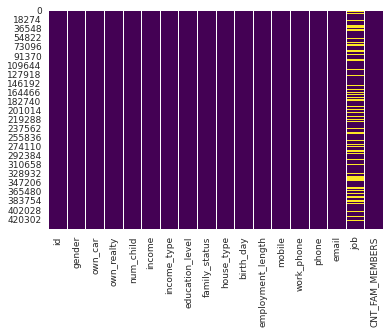

In [ ]:
sn.heatmap(application_df.isnull(),cbar=False,cmap='viridis')

The data appears to be relatively clean, with the exception of the `job` column, with over 134203 out of 438557 entries being NA. That is more than 1/4 of the entries being missing. Since there is the income column, we can safely drop this column since it is the income that will significantly determine his/her credit score. As for the other columns, since there is only 1 NA value, we can simply drop the row.

In [ ]:
application_df.isnull().sum()

id                        0
gender                    0
own_car                   0
own_realty                0
num_child                 0
income                    0
income_type               0
education_level           0
family_status             0
house_type                0
birth_day                 0
employment_length         0
mobile                    0
work_phone                0
phone                     0
email                     0
job                  134203
CNT_FAM_MEMBERS           0
dtype: int64

For each categorical column, we should find out the different levels.

In [ ]:
categoricals_1 = ["income_type", "gender", "own_car", "own_realty", "income_type", "family_status"]
categoricals_2 = ["education_level", "house_type", "job"]

In [ ]:
for cat in categoricals_1:
  print(application_df[cat].unique())

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['M' 'F']
['Y' 'N']
['Y' 'N']
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']


#### Data visualization

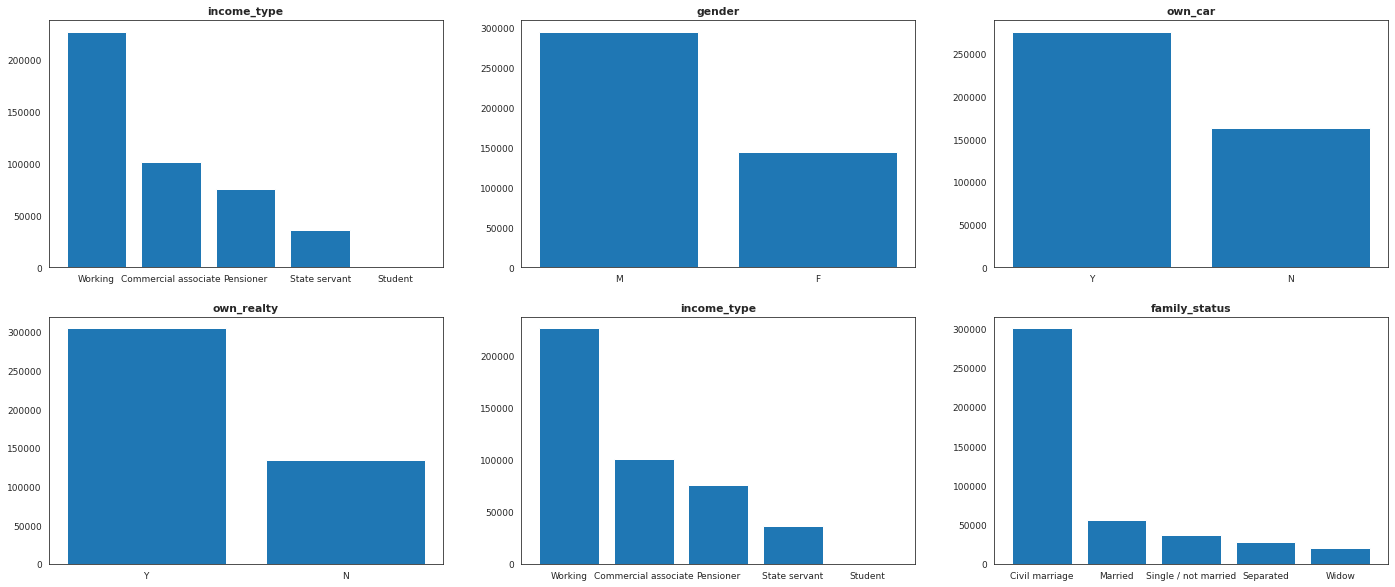

In [ ]:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(2,3, figsize=(24,10))
for i in range(2):
  for j in range(3):
    ax[i,j].set_title(categoricals_1[i*3+j], fontweight="bold")
    bars = ax[i,j].bar(application_df[categoricals_1[i*3+j]].dropna().unique(), application_df[categoricals_1[i*3+j]].value_counts())
    # ax[i,j].bar_label(bars)

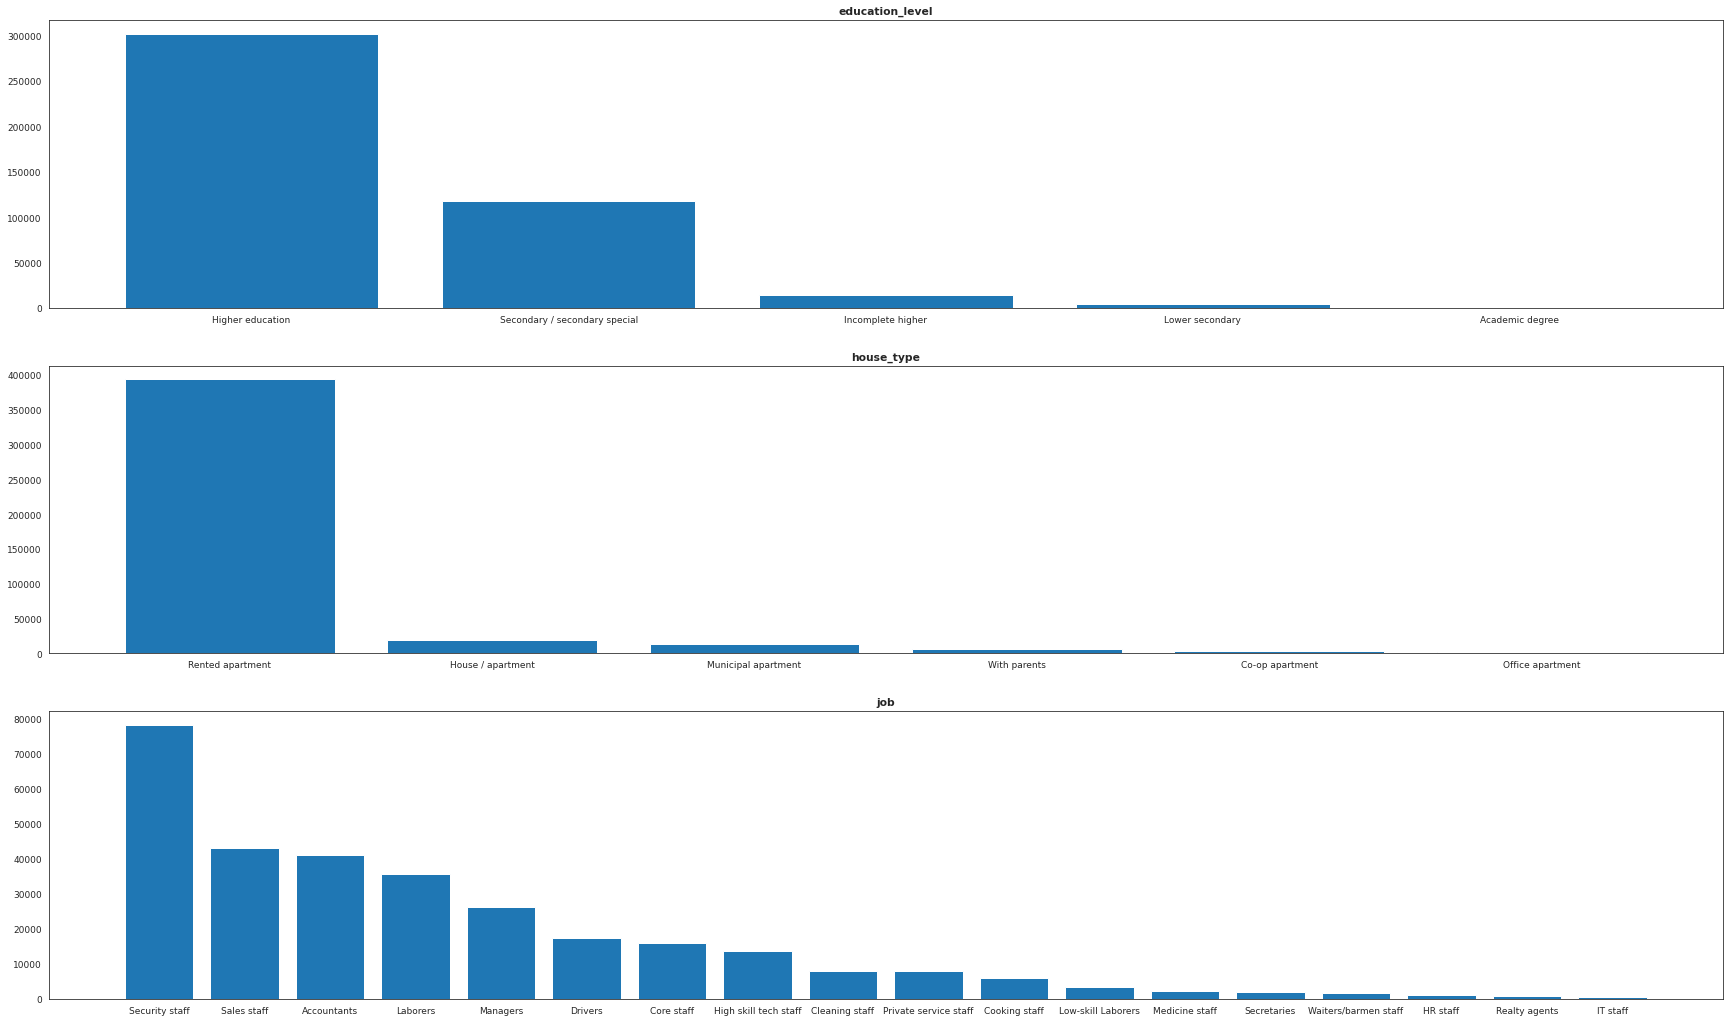

In [ ]:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(3,1, figsize=(30,18))
for i in range(3):
    ax[i].set_title(categoricals_2[i], fontweight="bold")
    bars = ax[i].bar(application_df[categoricals_2[i]].dropna().unique(), application_df[categoricals_2[i]].value_counts())
    # ax[i].bar_label(bars)

The categorical variables seem to be pretty sparse in terms of levels, with the `job` column having the most diverse entries. However, since a large proportion of the data is missing, we will most likely drop it.

#### Statistical Analysis

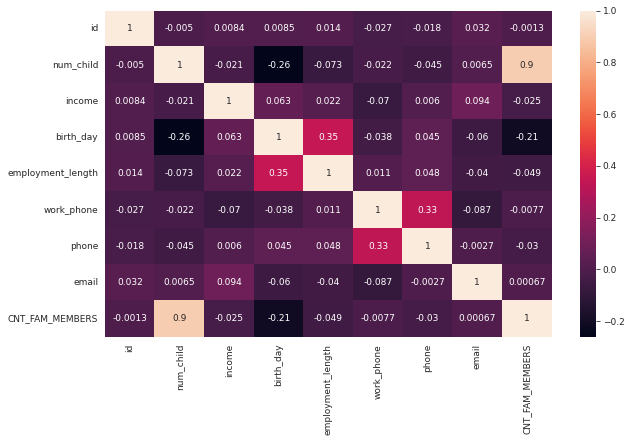

In [ ]:
# Remove NA rows and mobile column, because the all applications in the dataset own a mobile phone
application_stat_df = application_df.copy().dropna().drop("mobile", axis = 1)
application_stat_df["birth_day"] = -application_stat_df["birth_day"]/365.245
application_stat_df["employment_length"] = -application_stat_df["employment_length"]/365.245
application_stat_df.loc[application_stat_df['employment_length'] < 0,'employment_length']=0
application_stat_df = application_stat_df.select_dtypes(include = ["float64", "int64"])


# Create correlation matrix
corr_matrix = application_stat_df.corr()

# Visualize correleation matirx
plt.figure(figsize = (10,6))
sn.heatmap(corr_matrix, annot=True)
plt.show()

From the above results we can see that the `num_child` feature is highly correlated with `CNT_FAM_MEMEBRS` so we may just drop the `num_child` feature since it is less generic. 

The rest of the features are relatively uncorrelated, which means we can do regression with the assumption of independence later on.

#### Conclusion of EDA for application.csv

The features that we may look to drop from the dataset are:

*   `job`
*   `num_child`

These will be removed in the feature engineering portion of the notebook.


We will also remove 97 rows of inconsistent applications, where they are tagged to the same `id` but have different application details.

### `credit_record.csv`

#### Exploratory Data Analysis

In [ ]:
cred_df = pd.read_csv("/content/credit_record.csv", index_col=0)
cred_df.head()

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**credit_record.csv description**

| **Feature Name**    | **Description**                                  | **Remarks**                                                                                                           |
|---------------------|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| `id`                | ID of the client                              | NOT unique in the dataset.  A single client can have multiple entries as it refers to their credit balance in each month |
| `month_bal`            | Monthly credit balance of the customer                                 | The month of the extracted data is the starting point, backwards, 0 is the current month, <br> -1 is the previous month, and so on                                                                                              |
| `status`           | Credit Status of the customer                 | 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue <br> 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month                                                  

In [ ]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1048575 non-null  int64 
 1   month_bal  1048575 non-null  int64 
 2   status     1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


The database is completely clean with no NA entries.

In [ ]:
cred_unique_count = cred_df['id'].nunique()
print(cred_unique_count)

45985


1048575 entries belong to 45985 unique ids giving an average of around 23 records per unique id. 

Given the different origin of the `Application.csv`and `credit_record.csv` files, we should expect for some degree of non-overlap in user ids.

In [ ]:
common_ids = np.intersect1d(cred_df['id'], application_df['id'])
overlap_count = len(common_ids)

print('Number of common ids: ', overlap_count)
print('application_df overlap percentage: ', 100*overlap_count/app_unique_count,'%')
print('cred_df overlap percentage: ', 100*overlap_count/cred_unique_count,'%')

Number of common ids:  36457
application_df overlap percentage:  8.313835488358304 %
cred_df overlap percentage:  79.28020006523866 %


Only 62.3% of unique applicants in the application database have corresponding credit record entries. Our training data should only consist of user ids with associated records in both databases, and will only have a total of 36457 training records in total.

#### Data Visualization 

Max entries per id: 61
Min entries per id: 1
Mean entries per id 21.332391584606523
Mode entries per id: 8


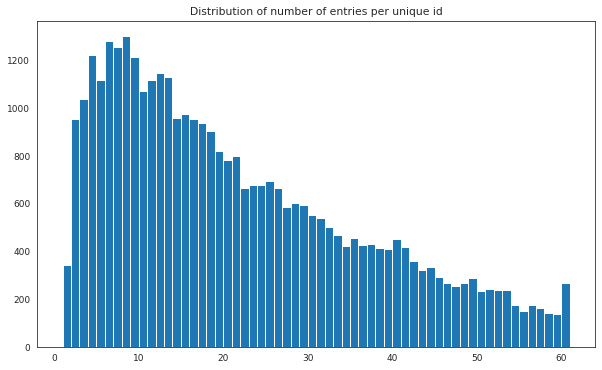

In [ ]:
overlap_cred_df = cred_df.copy()[np.isin(cred_df['id'], common_ids)]

# Histogram plot of distribution of entries per id
id_count = overlap_cred_df['id'].value_counts()

print('Max entries per id:', id_count.max())
print('Min entries per id:', id_count.min())
print('Mean entries per id', id_count.mean())
print('Mode entries per id:', id_count.mode()[0])
plt.figure(figsize=(10,6))
plt.title('Distribution of number of entries per unique id')
id_count_hist = plt.hist(id_count, bins=60)

The peak of the distribution is around 5-15, but a significant number of ids have a far larger number of records associated with it. 

In [ ]:
print(overlap_cred_df[overlap_cred_df['id'] == id_count.index[0]])

              id  month_bal status
1023498  5148819          0      C
1023499  5148819         -1      C
1023500  5148819         -2      C
1023501  5148819         -3      C
1023502  5148819         -4      C
...          ...        ...    ...
1023554  5148819        -56      0
1023555  5148819        -57      0
1023556  5148819        -58      0
1023557  5148819        -59      0
1023558  5148819        -60      X

[61 rows x 3 columns]


Credit records associated with a single unique id. The `month_bal` and `status` columns thus shows the evolving credit status of a single user over time. The `month_bal` column should be kept if we wish to assign different weights to credit status records depending on recency.

Total distribution C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: status, dtype: int64
Distribution by id 0    17522
C    12807
X     5998
1       81
5       47
2        2
3        0
4        0
Name: status, dtype: int64
Percentage of risky records 0.26063532270819 %


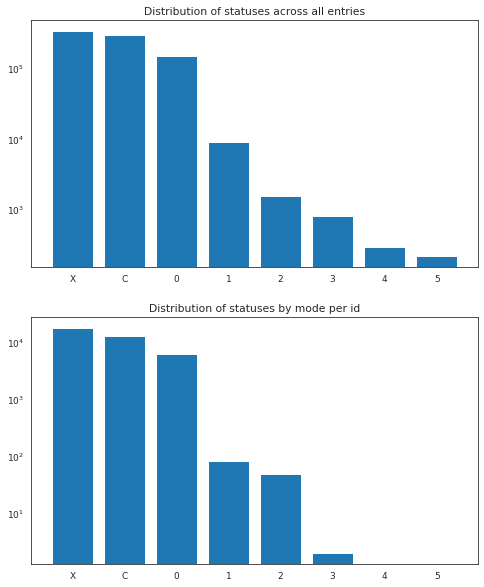

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,10))

# Plotting distribution of credit statuses across entire entries
status_counts = overlap_cred_df['status'].value_counts()

ax[0].set_title('Distribution of statuses across all entries')
ax[0].set_yscale('log')
ordered_status = ['X','C','0','1','2','3','4','5']
status_counts_bars = ax[0].bar(ordered_status, status_counts.values)

# Grouping values by mode credit status associated with each id
mode_status_by_id = overlap_cred_df.groupby('id')['status'].agg(lambda x: pd.Series.mode(x)[0])
mode_status_count = mode_status_by_id.value_counts()
for cat in ordered_status:
  if cat not in mode_status_count.index:
    mode_status_count[cat] = 0

ax[1].set_title('Distribution of statuses by mode per id')
ax[1].set_yscale('log')
mode_status_by_id_bars = ax[1].bar(ordered_status, mode_status_count.values)
risky_percentage = 100*(status_counts['3'] + status_counts['4'] + status_counts['5'])/np.sum(status_counts)

print('Total distribution', status_counts)
print('Distribution by id', mode_status_count)
print('Percentage of risky records', risky_percentage,'%')

The vast majority of entry statuses are associated with a lower credit risk (`'X', 'C', '0'`), while highly risky individuals (`'3', '4', '5'`) make up a very small minority of records at 0.26%, indicating that we have a highly skewed dataset.

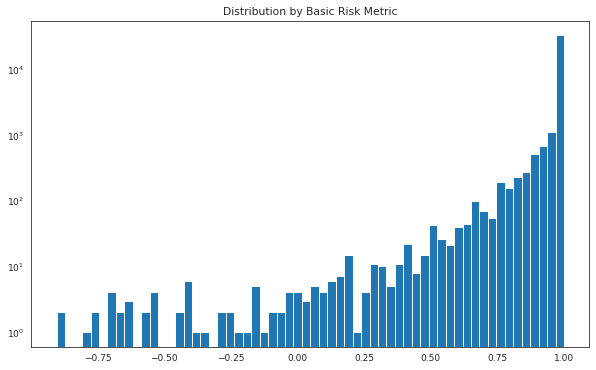

In [ ]:
# Assigning numerical values to the corresponding credit status
# as a very basic indicator of 'riskiness'

riskfactor = {'X':1,'C':1,'0':1,'1':0,'2':0,'3':-1,'4':-1,'5':-1}
riskmap = np.vectorize(lambda x: riskfactor[x])
risk_vector = riskmap(overlap_cred_df['status'].values)
new_cred_df = overlap_cred_df.copy()
new_cred_df['risk'] = risk_vector
new_cred_df.head()

# Aggregating values by mean of risk values

risk_by_id = new_cred_df.groupby('id')['risk'].mean()
plt.figure(figsize=(10,6))
plt.title('Distribution by Basic Risk Metric')
plt.yscale('log')
risk_bins = plt.hist(risk_by_id, bins=60)

A histogram based on a very rudimentary risk metric shows the relative distribution of 'risky' and 'non-risky' individuals. Note that this metric is based on a linear scale with no weightage given to status recency.

Number of rejected ids: 50
Below threshold percentage: 0.1371478728364923 %


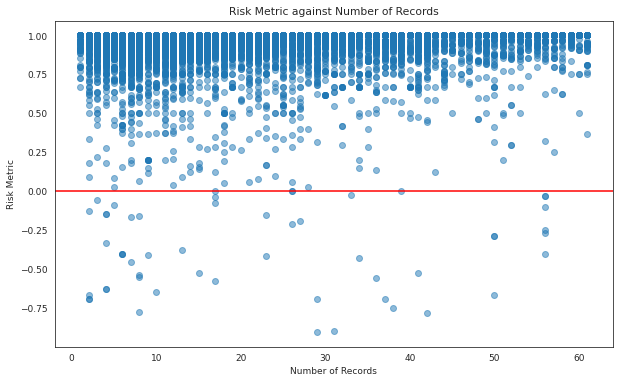

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Risk Metric against Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Risk Metric')
corr_scatter = plt.scatter(id_count, risk_by_id, alpha=0.5)

# Setting the threshold for rejection
threshold = 0
plt.axhline(threshold, color='r')
rejected_count = np.sum(risk_by_id < threshold)

print('Number of rejected ids:', rejected_count)
print('Below threshold percentage:', rejected_count*100/risk_by_id.shape[0], '%')


A scatter plot of an individual's riskiness against the number of records they have shows some clustering in the lower left, indicating that medium to higher-risk individuals have a slight tendency to have fewer credit records, but not vice versa. This might have to be taken into account depending on how our actual risk metric is designed.




## Feature Engineering

We crafted our training set by merging records with common user ids from both `application.csv` and `credit_record.csv`. 

Our target variable (`1` for 'Good' and `0` for 'Bad') is computed from the credit status records aggregated by user id with a self-defined conversion function, and added to the dataframe as a new column. A "Risk Value" is generated by converting the statuses into a value in accordance to the table below. 

Status | Risk Value
-------|-----------
X      |1
C      |1
0      |1
1      |0
2      |0
3      |-1
4      |-1
5      |-1


The mean score for each id is then calculated and a threshold score of `0.905` is used, with a score above the threshold being given a target variable of `1`, and a score below the threshold being given a score of `0`. Additionally, an override of the mean is used if the applicant has a credit status of `5` in their history. The combination of the chosen threshold score and override is utilised to increase the rates of 'Bad' target variables to replicate [2022 real-life credit card delinquency rates of 5.32% according to CNBC](https://www.cnbc.com/select/us-credit-card-debt-hits-all-time-high/).

Our input variables are given by the columns of `Application.csv`, with each column denoting an attribute of the associated `user_id`. This is further processed by converting categorical data to indicator variables as well as dropping the columns that were deemed to be unnecessary, namely `job` and `num_child`.

To maintain data frames for usage in their original forms, all feature engineering functions create a duplicate of the input data frame.

In [ ]:
""" Converts credit records:
    Converts 'status' from ordinal data into interval data
    Calculates mean of converted status for each id
    Sets a score for each id based on mean, treshold, and override
"""
def convert_credit_records(df):
  riskfactor = {'X':1,'C':1,'0':1,'1':0,'2':0,'3':-1,'4':-1,'5':-1}
  riskmap = np.vectorize(lambda x: riskfactor[x])
  df = df.copy()

  #group dataframe by unique ids
  groups = df.groupby('id')

  data = {}
  data['id'] = []
  data['score'] = []

  #iterates through all groups, utilising the key (id) and group (list of credit statuses for the key)
  for key, group in groups:
    score = 0
    data['id'].append(key)
    
    #sets override if a status of '5' is present
    override = group['status'].isin(['5']).any()
    mean_risk = riskmap(group['status'].values).mean()

    if override:
      score = 0
    elif mean_risk > 0.905:
      score = 1
    else:
      score = 0

    data['score'].append(score)
  
  return pd.DataFrame(data = data)

""" Converts application records
    Creates dummy data for income type, family status, education level, and house type
    Drop above categories and job category
    Convert gender, own_car and own_realty into a numerical representation of categorical data
"""
def convert_applications(df):
  application_num_df = application_df.copy()

  categories = ["income_type", "family_status", "education_level", "house_type"]
  for cat in categories:
    temp_df = pd.get_dummies(application_num_df[cat])
    application_num_df = pd.concat([application_num_df, temp_df], axis=1)

  categories.append("job")
  application_num_df = application_num_df.drop(categories, axis=1)

  categories = ["own_car", "own_realty"]
  for cat in categories:
    application_num_df[cat] = np.where(application_num_df[cat] == "Y", 1, 0)

  application_num_df['gender'] = np.where(application_num_df['gender'] == "M", 1, 0)

  return application_num_df

""" Drops a category string or list by dropping column with matching name
    Check if input matches the correct type, if not return original dataframe
    Attempt to drop the given column(s), if encounters a key error indicating that
    one or more are missing, return original dataframe
"""
def drop_category(df, cat_name):
  temp_df = df.copy()
  if type(cat_name) not in [list, str]:
    return df
  try:
    temp_df = temp_df.drop(cat_name, axis = 1)
  except KeyError:
    pass
  return temp_df

""" Merges two dataframes by a given method
    Method of join not specified to make testing of different joins easier
    Does not operate in-place for either dataframe, creating a duplicate before the merge
"""
def join_dataframes(df1, df2, method):
  return df1.merge(df2, how = method, on = "id")


After the conversion of both the `credit_record.csv` and `application.csv`, the resulting dataframes are combined with a full inner join.

We are utilising an inner join despite the decrease in total rows as the score provided by the credit history will be utilised as the y-score which will be important for training and testing.

In [ ]:
credit_histories = convert_credit_records(cred_df)
applications = drop_category(convert_applications(application_df), "num_child")

joined_dataframe = join_dataframes(applications, credit_histories, "inner")

In [ ]:
joined_dataframe.columns

Index(['id', 'gender', 'own_car', 'own_realty', 'income', 'birth_day',
       'employment_length', 'mobile', 'work_phone', 'phone', 'email',
       'CNT_FAM_MEMBERS', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working', 'Civil marriage', 'Married', 'Separated',
       'Single / not married', 'Widow', 'Academic degree', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'score'],
      dtype='object')

In [ ]:
joined_dataframe

,id,gender,own_car,own_realty,income,birth_day,employment_length,mobile,work_phone,phone,...,Incomplete higher,Lower secondary,Secondary / secondary special,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,score
0,5008804,1,1,1,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,5008805,1,1,1,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,5008806,1,1,1,112500.0,-21474,-1134,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,5008808,0,0,1,270000.0,-19110,-3051,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4,5008809,0,0,1,270000.0,-19110,-3051,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,315000.0,-17348,-2420,1,0,0,...,0,0,1,0,1,0,0,0,0,0
36453,5149834,0,0,1,157500.0,-12387,-1325,1,0,1,...,0,0,0,0,1,0,0,0,0,0
36454,5149838,0,0,1,157500.0,-12387,-1325,1,0,1,...,0,0,0,0,1,0,0,0,0,0
36455,5150049,0,0,1,283500.0,-17958,-655,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
processed_dataframe = drop_category(joined_dataframe, ["id", "CNT_FAM_MEMBERS"])

Based of our metric of classifying a "bad" customer, lets take a look at how many "bad" customers were identified overall.

In [ ]:
bad_num, good_num = processed_dataframe["score"].value_counts().sort_index()
print('Number of good customers: ', good_num)
print('Number of bad customers: ', bad_num)
print('Percentage of bad customers: ', bad_num*100/(good_num + bad_num), '%')

Number of good customers:  34514
Number of bad customers:  1943
Percentage of bad customers:  5.329566338426091 %


In [ ]:
processed_dataframe = processed_dataframe.astype(int)

### Conclusions from Feature Engineering
Based on our final dataset, it appears that our dataset is extremely imbalanced, with the minority class present in only ~5.32% of the entire dataset despite the high treshold value.

We have to take this into account for model performance and evaluation, as it will likely mean that a lot of the test data points will be classified as a "good customer". We will thus try and adopt remdial measures to try and fix this issue.

# Splitting the Dataset

We now split the dataset into the training (X) and the response (y)

In [ ]:
# Design Matrix: Where we will split and obtain train_x and test_x
X = np.array(processed_dataframe.iloc[:,:-1]) 

# Target Variable: Where will split and obtain train_y and test_y
y = np.array(processed_dataframe.iloc[:,-1])

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,1,1,427500,-12005,-4542,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,1,427500,-12005,-4542,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,1,1,112500,-21474,-1134,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1,270000,-19110,-3051,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,270000,-19110,-3051,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,315000,-17348,-2420,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
36453,0,0,1,157500,-12387,-1325,1,0,1,1,...,1,0,0,0,0,1,0,0,0,0
36454,0,0,1,157500,-12387,-1325,1,0,1,1,...,1,0,0,0,0,1,0,0,0,0
36455,0,0,1,283500,-17958,-655,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Machine Learning Models

## Overview of Machine Learning Algorithms

We trained and compared the classification model for each 4 different ML Algorithms:
* Logistic Regression
* Decision Tree
* Random Forest
* LightGBM

**Disclaimer**: While training the models, the results may differ slightly due to us using stratified k-fold cross validation.

## Model Training/Predicting Methodology

Information Leakage is a very common issue in Machine Learning, and it happens when information from outside the training dataset is used to create the model. To ensure that our model does not have any information leakage, which guarantees the performance of the model, we will adopt the following training methodology: 

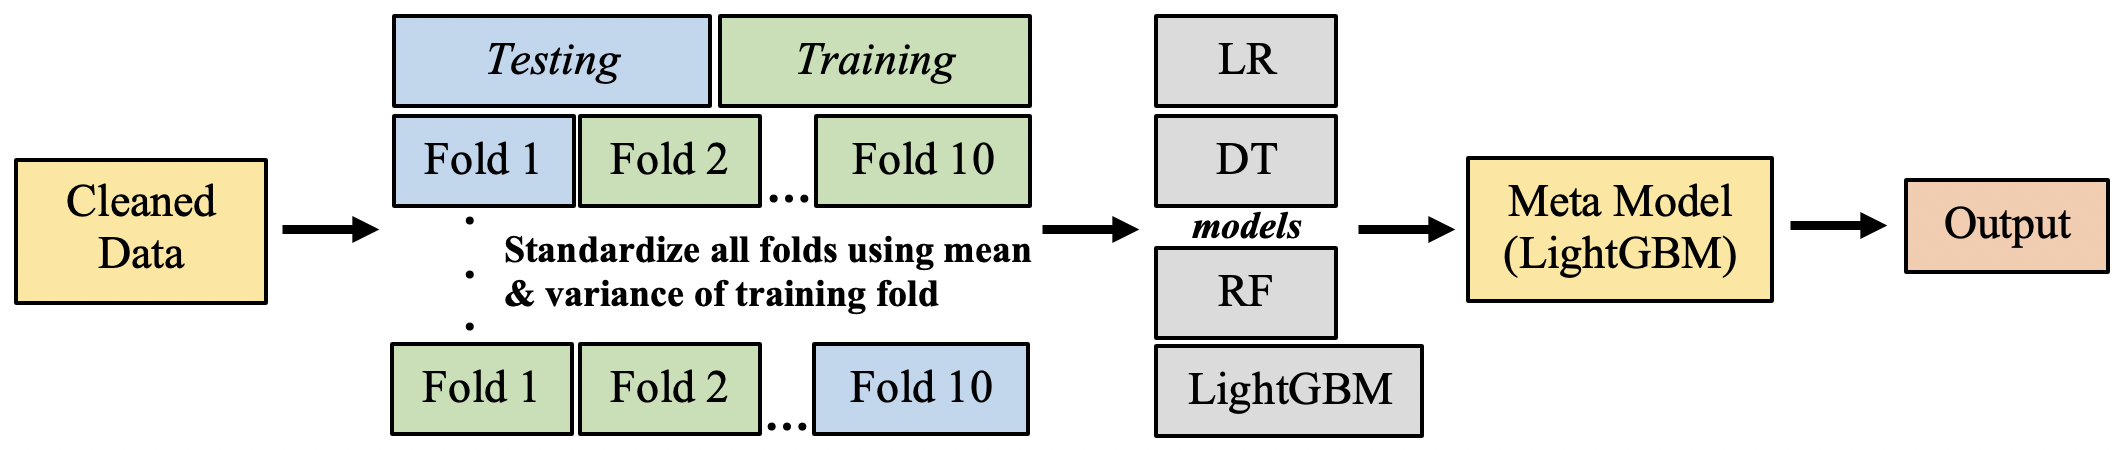

In [ ]:
# Imports
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

We will write some common functions that we will call repeatedly when it comes to evaluating our models. These are:



*   Confusion Matrix (Normalized)
*   Precision Recall Curve
*   Receiver Operating Characteristic (ROC) Curve 



In [ ]:
# Function to plot the average confusion_matrix after cross-validation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm) # Print the raw confusion matrix

    # Create plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Function to plot ROC Curve for each Cross Validation Fold
def plot_roc(y_test_lst, y_pred_lst):
  for i in range(len(y_test_lst)):
      fpr, tpr, _ = roc_curve(y_test_lst[i], y_pred_lst[i])
      plt.plot(fpr, tpr, label = 'Fold %d ROC=%.4f' % (i+1, roc_auc_score(y_test_lst[i], y_pred_lst[i])))
  plt.title(f'Receiver Operating Characteristic (ROC) Curve')
  plt.plot([0, 1], ls="--")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend()
  plt.show()

In [ ]:
# Function to plot Precision Recall Curve for each Cross Validation Fold
def plot_precision_recall(y_test_lst, y_pred_lst):
    for i in range(len(y_test_lst)):
      precision, recall, thresholds = precision_recall_curve(y_test_lst[i], y_pred_lst[i])
      plt.plot(recall, precision, label = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision)))
      plt.plot([0, 1], [0.5, 0.5], linestyle = '--')  #baseline
    plt.xlabel('Recall', fontsize = 14)
    plt.ylabel('Precision', fontsize = 14)
    plt.title('Precision-Recall Curve', fontsize = 22)
    plt.legend()
    plt.show()

In [ ]:
# Function to print the average classification report of all the reports
# from each cross-validation.
def print_classification_report(class_report_dict):
  class_report_np = []
  for report in class_report_dict:
      class_report_np.append(pd.DataFrame(report).to_numpy())
  res = pd.DataFrame(np.mean(class_report_np, axis=0))
  res = res.rename(columns={0: "0", 1: "1", 2: "accuracy", 3: "macro avg", 4: "weighted avg"})
  res = res.rename(index={0: "precision", 1: "recall", 2: "f1-score", 3: "support"})
  return res

## Baseline Models

We will first implement the baseline models with no additional hyperparameters and no attempt to correct the imbalanced data. This gives a guage of how the baseline models perform on our dataset.

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
def cross_val_base(mod, numFolds):
  # Lists to append the various results
  conf_matrix_lst = []
  classification_report_lst = []
  y_test_lst = []
  y_predprob_lst = []

  # Conduct Stratified K-Fold Cross Validation
  kf = StratifiedKFold(n_splits=numFolds)
  for fold, (train_index, test_index) in enumerate(kf.split(X,y)):

      # Splitting the dataset up
      X_train = X[train_index]
      y_train = y[train_index]
      X_test = X[test_index]
      y_test = y[test_index] 

      # Standardisation of the kth fold
      stan_scaler = StandardScaler()
      X_train_stan = stan_scaler.fit_transform(X_train)
      X_test_stan = stan_scaler.transform(X_test)

      # Training the model
      mod.fit(X_train_stan, y_train)  

      # Testing the model on the test split
      y_pred = mod.predict(X_test_stan)

      # Obtain the various evaluation metrics
      conf_matrix = confusion_matrix(y_test, y_pred)
      conf_matrix_lst.append(conf_matrix)
      classification_report_lst.append(classification_report(y_test, y_pred, zero_division=0, output_dict=True))
      y_test_lst.append(y_test)
      y_predprob_lst.append(mod.predict_proba(X_test_stan)[:,1])
      
  return classification_report_lst, np.mean(conf_matrix_lst, axis=0), y_test_lst, y_predprob_lst

### Logistic Regression: Baseline

In [ ]:
# Create model
model = LogisticRegression(max_iter=1000)

In [ ]:
# Train the model and get the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

     0       1
0  1.0   193.3
1  0.5  3450.9
[[5.14668039e-03 9.94853320e-01]
 [1.44868749e-04 9.99855131e-01]]


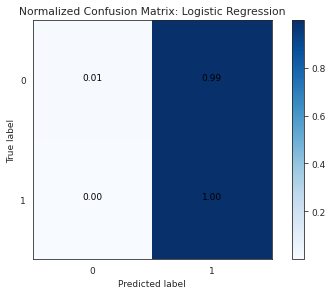

In [ ]:
# Plotting the confusion matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix: Logistic Regression')

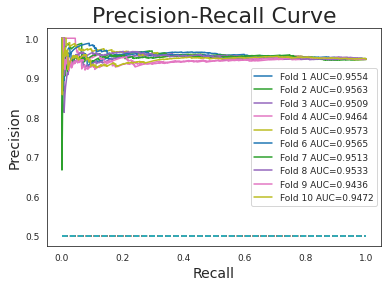

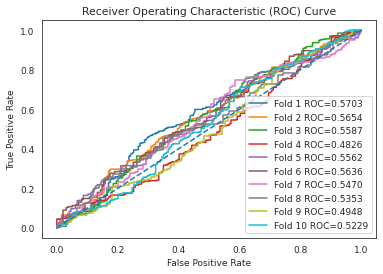

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.158333,0.946957,0.946842,0.552645,0.904916
recall,0.005155,0.999855,0.946842,0.502505,0.946842
f1-score,0.009842,0.972687,0.946842,0.491265,0.921371
support,194.300000,3451.400000,0.946842,3645.700000,3645.700000


### Decision Tree: Baseline

In [ ]:
# Create model
model = DecisionTreeClassifier()

In [ ]:
# Train the model and get the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0   15.0   179.3
1  558.8  2892.6
[[0.07720021 0.92279979]
 [0.16190531 0.83809469]]


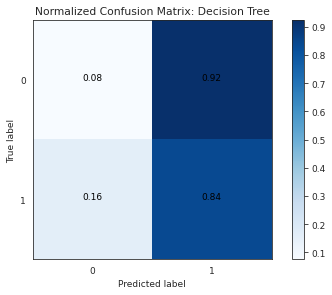

In [ ]:
# Plot the confusion matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree')

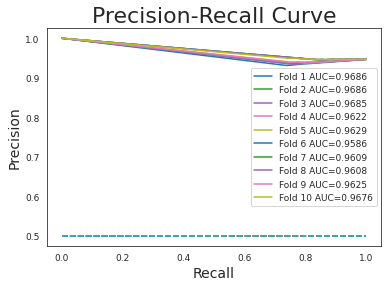

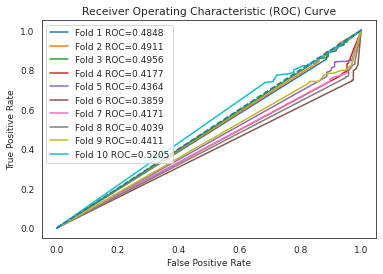

In [ ]:
# Plot the Precision Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.029404,0.941477,0.79754,0.485441,0.892867
recall,0.077243,0.838089,0.79754,0.457666,0.797540
f1-score,0.041502,0.886191,0.79754,0.463847,0.841173
support,194.300000,3451.400000,0.79754,3645.700000,3645.700000


### Random Forest: Baseline

In [ ]:
# Create model
model = RandomForestClassifier()

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0    6.6   187.7
1  306.8  3144.6
[[0.03396809 0.96603191]
 [0.08889146 0.91110854]]


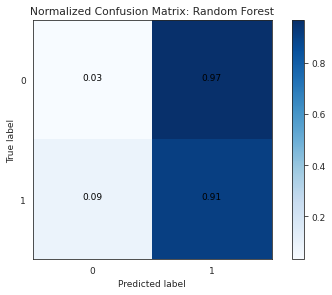

In [ ]:
# print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest')

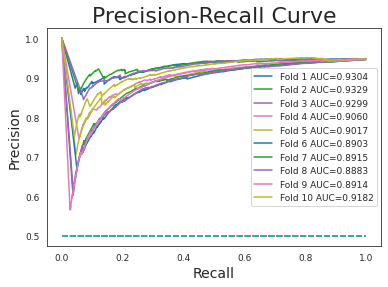

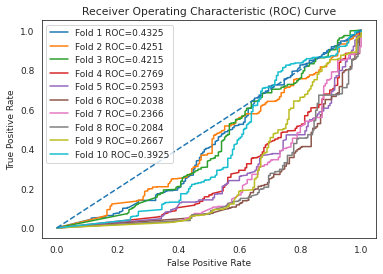

In [ ]:
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.029649,0.943591,0.864358,0.486620,0.894880
recall,0.033989,0.911104,0.864358,0.472546,0.864358
f1-score,0.027777,0.926649,0.864358,0.477213,0.878743
support,194.300000,3451.400000,0.864358,3645.700000,3645.700000


### LightGBM: Baseline

In [ ]:
# Create the model
model = LGBMClassifier()

In [ ]:
# Train the model and get the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

      0       1
0   0.3   194.0
1  12.8  3438.6
[[0.001544   0.998456  ]
 [0.00370864 0.99629136]]


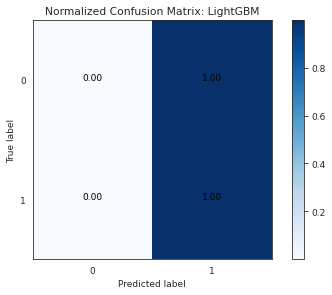

In [ ]:
# Plot Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LightGBM')

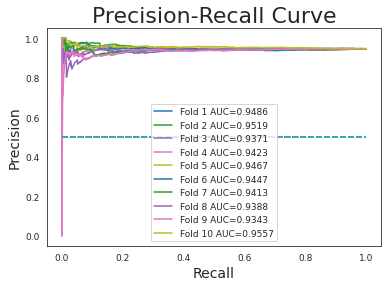

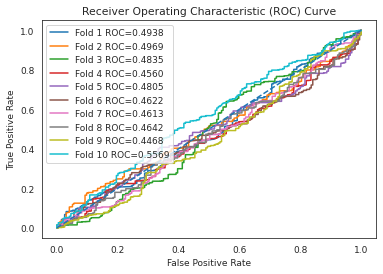

In [ ]:
# Plot the Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.038571,0.946594,0.943275,0.492583,0.898197
recall,0.001546,0.996291,0.943275,0.498919,0.943275
f1-score,0.002970,0.970805,0.943275,0.486888,0.919223
support,194.300000,3451.400000,0.943275,3645.700000,3645.700000


### Conclusions from baseline models

Because the dataset is so imbalanced, the baseline models clearly cannot identify the "bad" applications. We therefore have to try and use remedial measures in order to try and increase the True Negative Rate (Specificity).

## Remedial Measure 1: SMOTE

Our first remedial measure is that of Synthetic Minority Oversampling Technique (SMOTE). SMOTE is part of the Imbalanced Learning Library in Python, and it is technique used to correct Imbalanced Datasets by either Oversampling the Minority Class.


In [ ]:
def cross_val_smote(mod, numFolds):
  # Lists to append the various results
  conf_matrix_lst = []
  kf = StratifiedKFold(n_splits=numFolds)
  classification_report_lst = []
  y_test_lst = []
  y_predprob_lst = []

  # Conduct Stratified K-Fold Cross Validation
  for fold, (train_index, test_index) in enumerate(kf.split(X,y), 1):
      # Splitting the dataset up
      X_train = X[train_index]
      y_train = y[train_index]
      X_test = X[test_index]
      y_test = y[test_index]

      # Standardisation of the kth fold
      stan_scaler = StandardScaler()
      X_train_stan = stan_scaler.fit_transform(X_train)
      X_test_stan = stan_scaler.transform(X_test)

      # Using SMOTE() to balance the data
      sm = SMOTE()
      X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_stan, y_train)

      # Train the model
      mod.fit(X_train_oversampled, y_train_oversampled)  

      # Predict the model and get the results
      y_pred = mod.predict(X_test_stan)
      conf_matrix = confusion_matrix(y_test, y_pred)

      # Obtain the evaluation metrics
      conf_matrix_lst.append(conf_matrix)
      classification_report_lst.append(classification_report(y_test, y_pred, zero_division=0, output_dict=True))
      y_test_lst.append(y_test)
      y_predprob_lst.append(mod.predict_proba(X_test_stan)[:,1])
  return classification_report_lst, np.mean(conf_matrix_lst, axis=0), y_test_lst, y_predprob_lst

### Logistic Regression: SMOTE

In [ ]:
# Create model
model = LogisticRegression()

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_smote(model, 10)

        0       1
0    96.5    97.8
1  1527.0  1924.4
[[0.49665466 0.50334534]
 [0.44242916 0.55757084]]


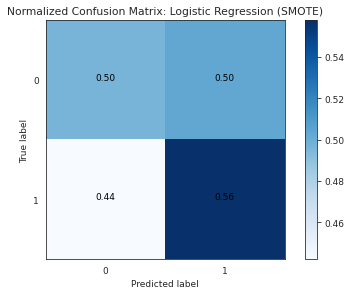

In [ ]:
# Plot the confusion matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression (SMOTE)')

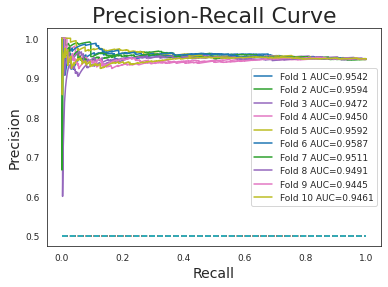

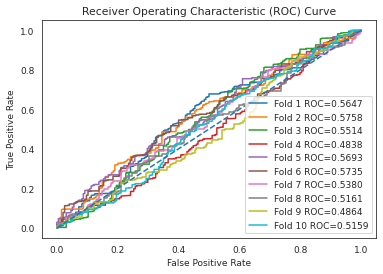

In [ ]:
# Plot the Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.060137,0.951233,0.55432,0.505685,0.903742
recall,0.496667,0.557567,0.55432,0.527117,0.554320
f1-score,0.107171,0.701767,0.55432,0.404469,0.670077
support,194.300000,3451.400000,0.55432,3645.700000,3645.700000


### Decision Tree: SMOTE

In [ ]:
# Create the model
model = DecisionTreeClassifier()

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_smote(model, 10)

        0       1
0    26.4   167.9
1  1001.9  2449.5
[[0.13587236 0.86412764]
 [0.290288   0.709712  ]]


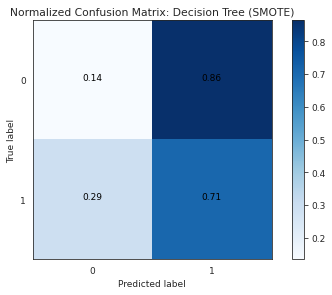

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree (SMOTE)')

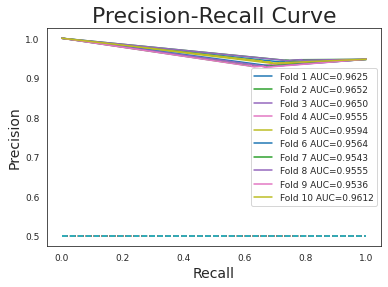

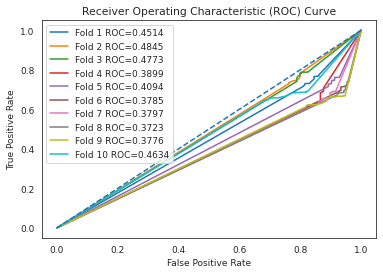

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.026417,0.935648,0.679126,0.481033,0.887190
recall,0.135958,0.709709,0.679126,0.422834,0.679126
f1-score,0.044104,0.806596,0.679126,0.425350,0.765957
support,194.300000,3451.400000,0.679126,3645.700000,3645.700000


### Random Forest: SMOTE

In [ ]:
# Create the model
model = RandomForestClassifier()

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_smote(model, 10)

       0       1
0   13.7   180.6
1  652.1  2799.3
[[0.07050952 0.92949048]
 [0.18893782 0.81106218]]


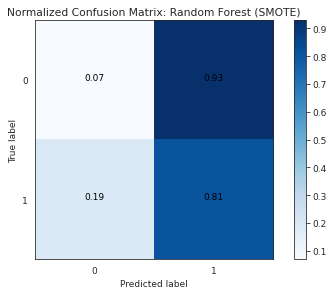

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest (SMOTE)')

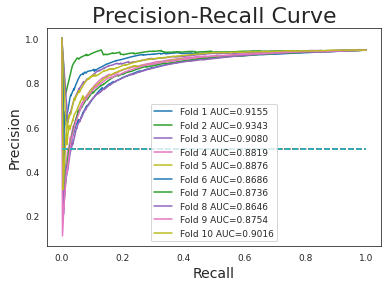

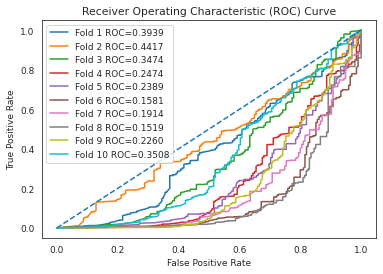

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.021162,0.939274,0.771592,0.480218,0.890342
recall,0.070555,0.811057,0.771592,0.440806,0.771592
f1-score,0.032101,0.869893,0.771592,0.450997,0.825242
support,194.300000,3451.400000,0.771592,3645.700000,3645.700000


### LightGBM: SMOTE

In [ ]:
# Create the model
model = LGBMClassifier()

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_smote(model, 10)

       0       1
0   16.6   177.7
1  319.9  3131.5
[[0.08543489 0.91456511]
 [0.09268703 0.90731297]]


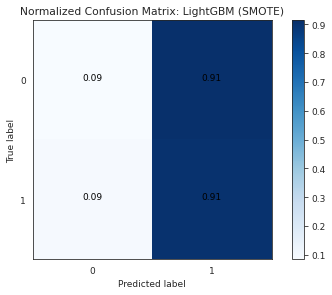

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LightGBM (SMOTE)')

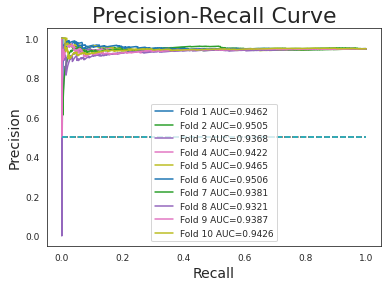

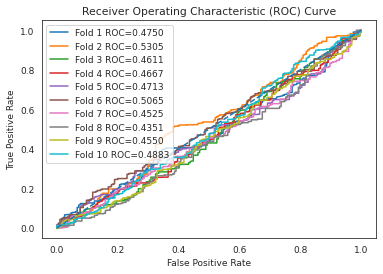

In [ ]:
# Plot Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.050588,0.946286,0.86351,0.498437,0.898548
recall,0.085456,0.907312,0.86351,0.496384,0.863510
f1-score,0.063309,0.926342,0.86351,0.494825,0.880345
support,194.300000,3451.400000,0.86351,3645.700000,3645.700000


### Conclusion regarding SMOTE

We can see that adopting SMOTE helps us detect some of the "bad" customers, but overall the effect has not been great, as a large proportion of the "bad" customers are still being approved. 

## Remedial Measure 2: Using Class Weights during model training

A second possible way to correct an imbalanced dataset would be to use class weights. Class weighting adjusts the cost function of the model so that misclassifying an observation from the minority class is more heavily penalized than misclassifying an observation from the majority class.

### Logistic Regression: Class Weights

In [ ]:
# Create the model with class weights
model = LogisticRegression(class_weight = "balanced")

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

        0       1
0    95.0    99.3
1  1529.8  1921.6
[[0.48893464 0.51106536]
 [0.44324042 0.55675958]]


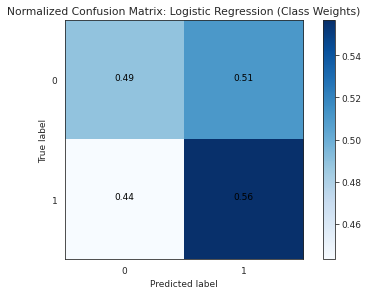

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression (Class Weights)')

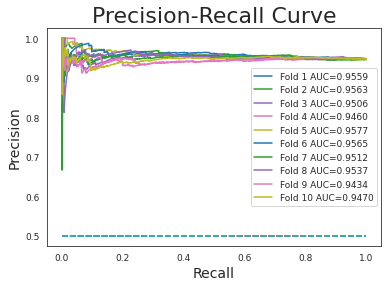

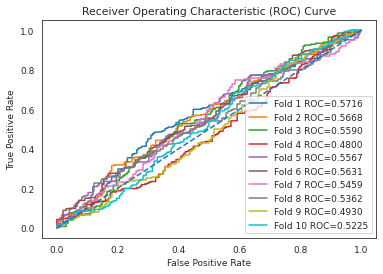

In [ ]:
# Plot the Precision Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.059084,0.950522,0.553139,0.504803,0.903013
recall,0.488937,0.556755,0.553139,0.522846,0.553139
f1-score,0.105273,0.700440,0.553139,0.402856,0.668719
support,194.300000,3451.400000,0.553139,3645.700000,3645.700000


### Decision Tree: Class Weights

In [ ]:
# Create the model with class weights
model = DecisionTreeClassifier(class_weight="balanced")

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0   26.3   168.0
1  727.0  2724.4
[[0.13535769 0.86464231]
 [0.21063916 0.78936084]]


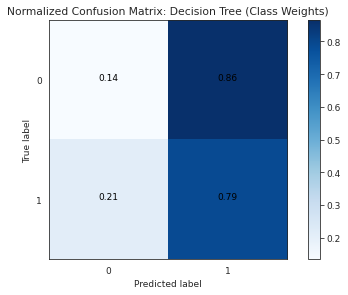

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree (Class Weights)')

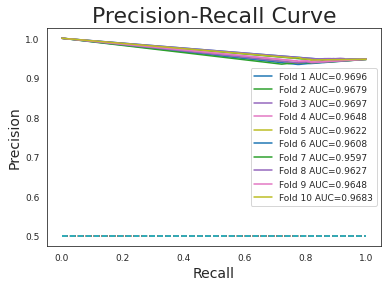

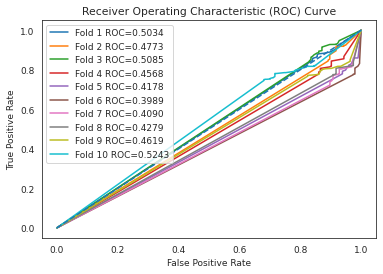

In [ ]:
# Plot the Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.036105,0.941809,0.754503,0.488957,0.893537
recall,0.135469,0.789356,0.754503,0.462413,0.754503
f1-score,0.056510,0.858319,0.754503,0.457414,0.815585
support,194.300000,3451.400000,0.754503,3645.700000,3645.700000


### Random Forest: Class Weights

In [ ]:
# Create the model with class weights
model = RandomForestClassifier(class_weight="balanced")

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0   11.1   183.2
1  319.2  3132.2
[[0.05712815 0.94287185]
 [0.09248421 0.90751579]]


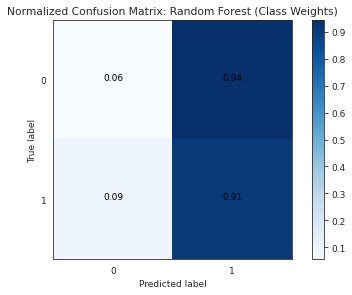

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest (Class Weights)')

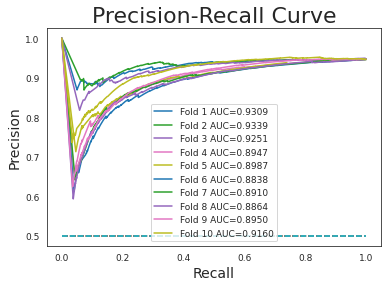

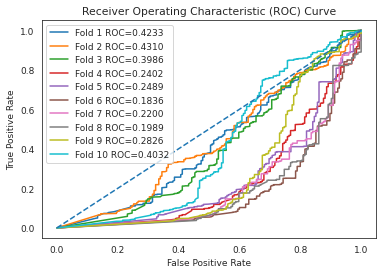

In [ ]:
# Plot the Precision Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.041930,0.944689,0.862191,0.493309,0.896574
recall,0.057158,0.907511,0.862191,0.482335,0.862191
f1-score,0.042789,0.925274,0.862191,0.484032,0.878241
support,194.300000,3451.400000,0.862191,3645.700000,3645.700000


### LightGBM: Class Weights

In [ ]:
# Create the model with class weights
model = LGBMClassifier(class_weight="balanced")

In [ ]:
# Train the model and obtain the results
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0   47.8   146.5
1  940.5  2510.9
[[0.24601132 0.75398868]
 [0.27249812 0.72750188]]


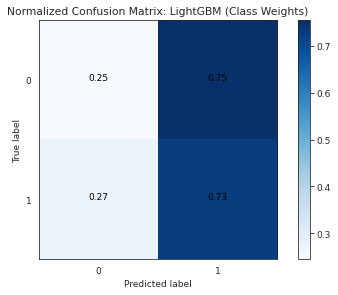

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LightGBM (Class Weights)')

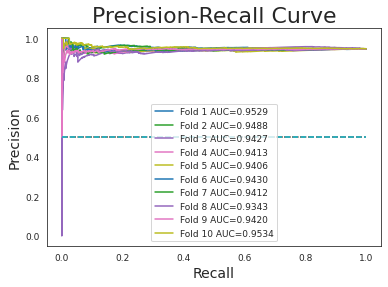

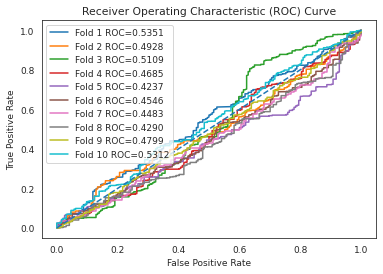

In [ ]:
# Plot the Precision Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.048798,0.944805,0.701836,0.496802,0.897051
recall,0.246135,0.727496,0.701836,0.486816,0.701836
f1-score,0.081006,0.821030,0.701836,0.451018,0.781589
support,194.300000,3451.400000,0.701836,3645.700000,3645.700000


### Conclusions regarding Class Weights

We can see that using class weights has helped us to better detect the "bad" customers, but that is at the expense of the wrong rejecting the "good" customers as well. That effect is particularly strong in Logistic Regression, which esentially is nob better than a coin flip.

# Model Stacking to Optimise Predictive Capabilities

Model Stacking is a way to improve model predictions by combining the outputs of multiple models and running them through another machine learning model called a meta-learner.

A stacked model works by running the output of multiple models through a “meta-learner” (usually a linear regressor/classifier, but can be other models like decision trees). The meta-learner attempts to minimize the weakness and maximize the strengths of every individual model. The result is usually a very robust model that generalizes well on unseen data.

In [ ]:
# Base models
level0 = list()
level0.append(('LR', LogisticRegression(class_weight="balanced")))
level0.append(('cart', DecisionTreeClassifier(class_weight="balanced")))
level0.append(('rf', RandomForestClassifier(class_weight="balanced")))
level0.append(('lgb', LGBMClassifier(class_weight="balanced")))

# define meta learner model
level1 = LGBMClassifier(class_weight={0:115, 1:6}, objective="binary")

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Train and Predict
scores, conf_matrix, y_test_lst, y_predprob_lst = cross_val_base(model, 10)

       0       1
0   96.4    97.9
1  700.8  2750.6
[[0.49613999 0.50386001]
 [0.20304804 0.79695196]]


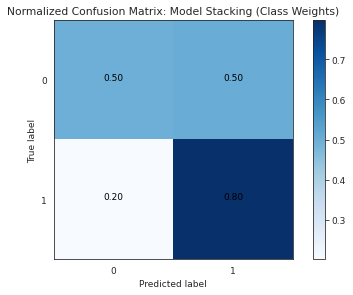

In [ ]:
# Plot the Confusion Matrix
print(pd.DataFrame(conf_matrix))

sn.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(conf_matrix,
                      classes=class_names, normalize=True, 
                      title='Normalized Confusion Matrix: Model Stacking (Class Weights)')

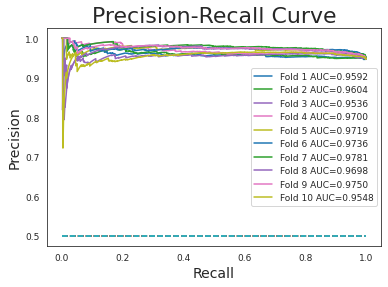

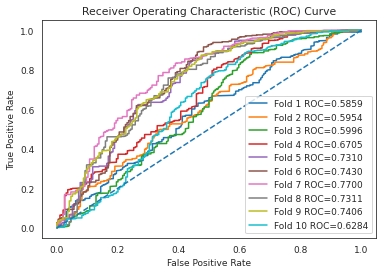

In [ ]:
# Plot the Precision-Recall Curve
plot_precision_recall(y_test_lst, y_predprob_lst)
print("\n")
plot_roc(y_test_lst, y_predprob_lst)

In [ ]:
# Print the Classification Report
print_classification_report(scores)

,0,1,accuracy,macro avg,weighted avg
precision,0.121250,0.965674,0.780919,0.543462,0.920672
recall,0.496001,0.796952,0.780919,0.646476,0.780919
f1-score,0.194570,0.873097,0.780919,0.533833,0.836937
support,194.300000,3451.400000,0.780919,3645.700000,3645.700000


### Conclusions regarding Model Stacking

We can see from the confusion matrix as well as other evaluation matrix such as the recall and f1-score that our model is a lot better than the previous models that we have implemented.

We are now able to detect close to 50% of the "bad" customers, while still correctly accepting most of the "good customers" at around 80%. This is probably the most balanced model that will balance the issue of minimizing the cost incurred by the financial institution by approving "bad" customer's application and minimizing the opportunity cost of rejecting a "good" customer's application.

# Test on Unlabelled Data

Since we only used 36457 rows of data from `applications.csv` because they were lablled, we shall run our model on the remaining unlabelled rows to see the Credit Card Approval Rate based on our model.

In [ ]:
# Obtain the unlabelled dataframe
unseen_df = applications[~applications["id"].isin(joined_dataframe)]
unseen_df = drop_category(unseen_df, ["id", "CNT_FAM_MEMBERS"])

# Standardise the unlabelled dataframe with the parameters of the labelled data
stan_scaler = StandardScaler()
stan_scaler.fit_transform(X)

# Predict
results = model.predict(stan_scaler.transform(unseen_df.values))

In [ ]:
rejected, approved = pd.DataFrame(results).value_counts().sort_index()

print(f"Number of Applications Rejected: {rejected}")
print(f"Number of Applications Approved: {approved}")
print(f"Application Approval Rate: {approved/(rejected+approved) * 100}%")

Number of Applications Rejected: 117399
Number of Applications Approved: 321158
Application Approval Rate: 73.23061768481635%


As seen above, model has a ~75% Application Approval Rate. Note that this number should be taken with a pinch of salt, because there's no way to tell if the model is classifying the applicants correctly.

# Conclusions

Our model was developed based on a number of assumptions. Firstly, we developed our own metric in order to come up with the target variable. A financial institution wishing to implement our model to help with their credit card approval process may develop their own metric in order to categorise what constitutes a "Good" and "Bad" applicant. 

Next, we also formulated our problem as wanting to minimise the True Negative Rate (TNR) while maximizing the False Negative Rate (FNR). In a practical setting, the problem formulation may be different based on the amount of profits earned by the financial institution. They may want to disregard the FNR because they are simply interested in identifying all the "Bad" Applications. They will therefore have to tweak the hyper parameters of our model.

In conclusion, we believe that our project has achieved its goals set out in our Problem Formulation, and that it serves as a foundation for developing more complex models to tackle this issue of Credit Card Approval.